Import 

In [3]:
#Improts 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

Create Connection

In [16]:
database = "/Users/salman/Downloads/Analysis/database.sqlite"

In [17]:
conn = sqlite3.connect(database)

In [18]:
tables = pd.read_sql("""select * from sqlite_master
                        where type = 'table';""", conn)

In [19]:
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


List of all Countries

In [20]:
countries = pd.read_sql("""select * from country;""",conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


List of Leagues and their Country

In [24]:
leagues = pd.read_sql("""select * from league left join country on country.id = league.id;""",conn)
leagues


,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


List of Teams

In [33]:
teams = pd.read_sql("""select * from team order by team_long_name limit 100;""",conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29.0,1. FC Kaiserslautern,KAI
1,15624,8722,31.0,1. FC Köln,FCK
2,16239,8165,171.0,1. FC Nürnberg,NUR
3,16243,9905,169.0,1. FSV Mainz 05,MAI
4,11817,8576,614.0,AC Ajaccio,AJA
...,...,...,...,...,...
95,49837,10191,1715.0,FC Thun,THU
96,26550,8611,1908.0,FC Twente,TWE
97,26555,9908,1903.0,FC Utrecht,UTR
98,49122,9824,286.0,FC Vaduz,VAD


List of Matches

In [39]:
matches = pd.read_sql(""" select match.id, Country.name as Country_name, League.name as League_name, season, stage, date,
                            HT.team_long_name AS home_team, AT.team_long_name as away_team, home_team_goal, away_team_goal
                            from match
                            join country on country.id = match.country_id
                            join league on league.id = match.league_id
                            
                            left join team as HT on HT.team_api_id = match.home_team_api_id
                            left join team as AT on AT.team_api_id = match.away_team_api_id
                            
                            where country_name = 'Spain'
                            order by date
                            limit 100;""", conn)

matches

,id,Country_name,League_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
...,...,...,...,...,...,...,...,...,...,...
95,21531,Spain,Spain LIGA BBVA,2008/2009,10,2008-11-09 00:00:00,RC Deportivo de La Coruña,RCD Espanyol,1,0
96,21532,Spain,Spain LIGA BBVA,2008/2009,10,2008-11-09 00:00:00,CA Osasuna,Atlético Madrid,0,0
97,21533,Spain,Spain LIGA BBVA,2008/2009,10,2008-11-09 00:00:00,Villarreal CF,UD Almería,2,1
98,21536,Spain,Spain LIGA BBVA,2008/2009,10,2008-11-09 00:00:00,Getafe CF,Valencia CF,0,3


In [41]:
leagues_by_season = pd.read_sql(""" select country.name as                                               country_name,league.name  as                                         league_name,
                                    season, count(distinct stage)as                                      number_of_stages, count(distinct                                     HT.team_long_name) as                                                number_of_teams, avg                                                 (home_team_goal) as                                                  avg_home_team_scores, avg                                            (away_team_goal) as                                                  avg_away_team_scores,
                                    avg                                                                  (home_team_goal-away_team_goal)                                      as avg_goal_diff, avg                                                (home_team_goal+away_team_goal)                                      as avg_goals, sum(home_team_goal                                     +away_team_goal) as total_goals                                      
                                    from match
                                    join country on country.id =                                         match.country_id
                                    
                                    join league on league.id = 
                                    match.league_id
                                    
                                    left join team as HT on 
                                    HT.team_api_id = 
                                    match.home_team_api_id
                                    
                                    left join team as AT on
                                    AT.team_api_id = 
                                    match.away_team_api_id
                                    
                                    where country_name in ('England',
                                    'Spain', 'Germany', 'France',                                        'Italy') group by country.name,
                                    league.name, season
                                    HAVING count(distinct stage) >                                       10 ORDER BY country.name,
                                    league.name, season DESC;
                                    """, conn)
leagues_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_scores,avg_goal_diff,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


In [48]:
df = pd.DataFrame(index=np.sort(leagues_by_season['season'].unique()), columns = leagues_by_season['country_name'].unique())
df.head(15)

,England,France,Germany,Italy,Spain
2008/2009,NaN,NaN,NaN,NaN,NaN
2009/2010,NaN,NaN,NaN,NaN,NaN
2010/2011,NaN,NaN,NaN,NaN,NaN
2011/2012,NaN,NaN,NaN,NaN,NaN
2012/2013,NaN,NaN,NaN,NaN,NaN
2013/2014,NaN,NaN,NaN,NaN,NaN
2014/2015,NaN,NaN,NaN,NaN,NaN
2015/2016,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Average Goals per Game Over Time'}>

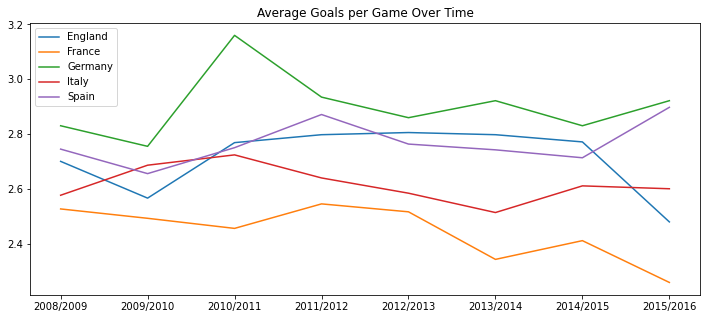

In [50]:
df.loc[:,'Germany'] = list(leagues_by_season.loc[leagues_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leagues_by_season.loc[leagues_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

Players Height

In [52]:
players_height = pd.read_sql(""" SELECT CASE
                             WHEN ROUND(height) < 165
                             THEN 165
                             WHEN ROUND(height) > 195
                             THEN 195
                             ELSE ROUND(height)
                             END as Calc_height,
                             COUNT(height) AS distribution,
                             (avg(PA_Grouped.avg_overall_rating))
                             AS avg_overall_rating,
                             (avg(PA_Grouped.avg_potential))
                             AS avg_potential, AVG(weight)
                             AS avg_weight
                             FROM player
                             
                             LEFT JOIN (select                                                    player_attributes.player_api_id,
                             avg(player_attributes.overall_rating)
                             AS avg_overall_rating,
                             avg(player_attributes.potential)
                             AS avg_potential
                             FROM player_attributes
                             
                             GROUP BY                                                             player_attributes.player_api_id)
                             AS PA_Grouped ON 
                             player.player_api_id =
                             PA_Grouped.player_api_id
                             GROUP BY calc_height
                             ORDER BY calc_height;
                             """, conn)
players_height

,Calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<AxesSubplot:title={'center':'Potential vs Height'}, xlabel='Calc_height'>

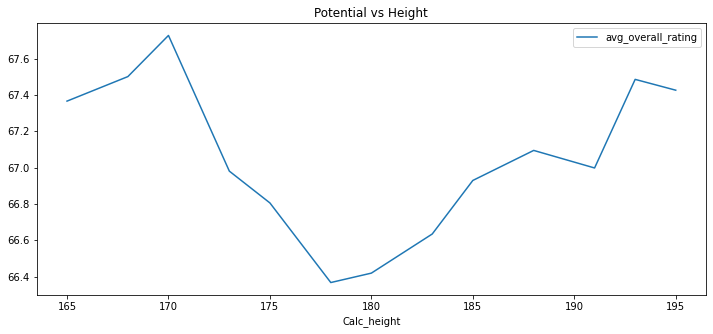

In [68]:
players_height.plot(x='Calc_height', y='avg_overall_rating', figsize=(12,5), title='Potential vs Height')